# 전국 가계지수 EDA

In [ ]:
# 한글 설정을 위해 koreanize-matplotlib 라이브러리 설치
!pip install koreanize-matplotlib
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
# 데이터 분석에 필요한 라이브러리를 import
import numpy as np   #넘파이 라이브러리(수치관련)
import pandas as pd  #판다스 라이브러리(데이터분석)
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import os
import matplotlib as mpl
import matplotlib.font_manager as fm

# 설치된 나눔 폰트들 중 기본 고딕을 우선 등록
targets = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf",
    "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf",
]
for p in targets:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

# 폰트 캐시 강제 재생성
fm._load_fontmanager(try_read_cache=False)

# 등록 확인
[f.name for f in fm.fontManager.ttflist if "Nanum" in f.name][:10]

## 데이터 불러오기

In [ ]:
file_path = "/content/drive/MyDrive/my_ws/SeSAC_Python/가구당_월평균_가계수지__전국_2인이상__20250910154128.xlsx"
df = pd.read_excel(file_path, sheet_name="데이터")
df.head(5)

,가계수지항목별,2024.1/4,2024.1/4.1,2024.1/4.2,2024.2/4,2024.2/4.1,2024.2/4.2,2024.3/4,2024.3/4.1,2024.3/4.2,2024.4/4,2024.4/4.1,2024.4/4.2
0,가계수지항목별,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,가구원수 (명),2.92,3.03,2.73,2.91,3.01,2.73,2.91,3.01,2.72,2.92,3.01,2.75
2,가구주연령 (세),53.7,50.55,59.44,53.67,50.37,59.6,53.66,50.22,59.95,53.53,50.41,59.34
3,가구분포 (%),100,64.57,35.43,100,64.29,35.71,100,64.61,35.39,100,65.08,34.92
4,소득,6342673,7210210,4761552,6175794,6832134,4994024,6555315,7256446,5275104,6360465,6969401,5225515


## 데이터 구조 확인

In [ ]:
print("Shape:", df.shape) # 행.열 크기 확인

Shape: (30, 13)


In [ ]:
print("Columns:", df.columns.tolist()) # 컬럼 이름 확

Columns: ['가계수지항목별', '2024.1/4', '2024.1/4.1', '2024.1/4.2', '2024.2/4', '2024.2/4.1', '2024.2/4.2', '2024.3/4', '2024.3/4.1', '2024.3/4.2', '2024.4/4', '2024.4/4.1', '2024.4/4.2']


In [ ]:
print("지표 종류:", df["가계수지항목별"].unique())  # 지표파악

지표 종류: ['가계수지항목별' '가구원수 (명)' '가구주연령 (세)' '가구분포 (%)' '소득' '경상소득' '근로소득' '사업소득'
 '재산소득' '이전소득' '비경상소득' '가계지출' '소비지출' '01.식료품 · 비주류음료' '02.주류 · 담배'
 '03.의류 · 신발' '04.주거 · 수도 · 광열' '05.가정용품 · 가사서비스' '06.보건' '07.교통' '08.통신'
 '09.오락 · 문화' '10.교육' '11.음식 · 숙박' '12.기타상품 · 서비스' '비소비지출' '처분가능소득' '흑자액'
 '흑자율 (%)' '평균소비성향 (%)']


## 결측치.데이터 타입 점검

In [ ]:
print("결측치:\n", df.isnull().sum())

결측치:
 가계수지항목별       0
2024.1/4      0
2024.1/4.1    0
2024.1/4.2    0
2024.2/4      0
2024.2/4.1    0
2024.2/4.2    0
2024.3/4      0
2024.3/4.1    0
2024.3/4.2    0
2024.4/4      0
2024.4/4.1    0
2024.4/4.2    0
dtype: int64


In [ ]:
print("데이터 타입:\n",df.dtypes)

데이터 타입:
 가계수지항목별       object
2024.1/4      object
2024.1/4.1    object
2024.1/4.2    object
2024.2/4      object
2024.2/4.1    object
2024.2/4.2    object
2024.3/4      object
2024.3/4.1    object
2024.3/4.2    object
2024.4/4      object
2024.4/4.1    object
2024.4/4.2    object
dtype: object


In [ ]:
# 분석을 위한 숫자형으로 타입 변환

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
print(df.dtypes)    # 모든 수치 컬럼이 float64 인지 확인
df.head()

가계수지항목별        object
2024.1/4      float64
2024.1/4.1    float64
2024.1/4.2    float64
2024.2/4      float64
2024.2/4.1    float64
2024.2/4.2    float64
2024.3/4      float64
2024.3/4.1    float64
2024.3/4.2    float64
2024.4/4      float64
2024.4/4.1    float64
2024.4/4.2    float64
dtype: object


,가계수지항목별,2024.1/4,2024.1/4.1,2024.1/4.2,2024.2/4,2024.2/4.1,2024.2/4.2,2024.3/4,2024.3/4.1,2024.3/4.2,2024.4/4,2024.4/4.1,2024.4/4.2
0,가계수지항목별,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,가구원수 (명),2.92,3.03,2.73,2.91,3.01,2.73,2.91,3.01,2.72,2.92,3.01,2.75
2,가구주연령 (세),53.70,50.55,59.44,53.67,50.37,59.60,53.66,50.22,59.95,53.53,50.41,59.34
3,가구분포 (%),100.00,64.57,35.43,100.00,64.29,35.71,100.00,64.61,35.39,100.00,65.08,34.92
4,소득,6342673.00,7210210.00,4761552.00,6175794.00,6832134.00,4994024.00,6555315.00,7256446.00,5275104.00,6360465.00,6969401.00,5225515.00


## 기초 통계량

In [ ]:
# wide 구조 그대로 → 각 열에 값이 1개씩만 있어서 describe()를 하면 mean=그 값, std=NaN 처럼 의미 없는 결과

df_income = df[df["가계수지항목별"] == "소득"].set_index("가계수지항목별")
df_income.describe()

,2024.1/4,2024.1/4.1,2024.1/4.2,2024.2/4,2024.2/4.1,2024.2/4.2,2024.3/4,2024.3/4.1,2024.3/4.2,2024.4/4,2024.4/4.1,2024.4/4.2
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0
25%,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0
50%,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0
75%,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0
max,6342673.0,7210210.0,4761552.0,6175794.0,6832134.0,4994024.0,6555315.0,7256446.0,5275104.0,6360465.0,6969401.0,5225515.0


In [ ]:
# long 구조로 변환 → “기간, 가구구분”별 여러 관측치가 모여서 groupby()를 통해 집단별 평균, 표준편차, 최소·최대값 계산 가능

# long 변환
df_long = df.melt(id_vars=["가계수지항목별"], var_name="기간_구분", value_name="값")

# 기간 추출 (예: 2024.1/4 -> 2024 1분기)
df_long["연도"] = df_long["기간_구분"].str.extract(r"(\d{4})")
df_long["분기"] = df_long["기간_구분"].str.extract(r"\.(\d)/4")
df_long["분기"] = df_long["분기"].astype(int).astype(str) + "분기"

# 가구구분 처리
df_long["가구구분"] = df_long["기간_구분"].apply(
    lambda x: "전체가구" if x.endswith("/4")
              else ("근로자가구" if x.endswith("/4.1") else "근로자외가구")
)

df_long = df_long[["가계수지항목별","연도","분기","가구구분","값"]]
df_long

,가계수지항목별,연도,분기,가구구분,값
0,가계수지항목별,2024,1분기,전체가구,NaN
1,가구원수 (명),2024,1분기,전체가구,2.92
2,가구주연령 (세),2024,1분기,전체가구,53.70
3,가구분포 (%),2024,1분기,전체가구,100.00
4,소득,2024,1분기,전체가구,6342673.00
...,...,...,...,...,...
355,비소비지출,2024,4분기,근로자외가구,837314.00
356,처분가능소득,2024,4분기,근로자외가구,4388201.00
357,흑자액,2024,4분기,근로자외가구,1170904.00
358,흑자율 (%),2024,4분기,근로자외가구,26.70


In [ ]:
# long 변환된 df_long 사용
# 예: 소득 항목만 추출
df_income = df_long[df_long["가계수지항목별"]=="소득"]

# 가구구분별 기초통계
df_income.groupby("가구구분")["값"].describe()

,count,mean,std,min,25%,50%,75%,max
가구구분,,,,,,,,
근로자가구,4.0,7067047.75,200903.363712,6832134.0,6935084.25,7089805.5,7221769.00,7256446.0
근로자외가구,4.0,5064048.75,235954.386704,4761552.0,4935906.00,5109769.5,5237912.25,5275104.0
전체가구,4.0,6358561.75,155318.990643,6175794.0,6300953.25,6351569.0,6409177.50,6555315.0


In [ ]:
df_income.groupby(["연도","분기","가구구분"])["값"].describe() # 각 분기 값은 이미 평균 통계치

count       mean  std        min        25%        50%  \
연도   분기  가구구분                                                             
2024 1분기 근로자가구     1.0  7210210.0  NaN  7210210.0  7210210.0  7210210.0   
         근로자외가구    1.0  4761552.0  NaN  4761552.0  4761552.0  4761552.0   
         전체가구      1.0  6342673.0  NaN  6342673.0  6342673.0  6342673.0   
     2분기 근로자가구     1.0  6832134.0  NaN  6832134.0  6832134.0  6832134.0   
         근로자외가구    1.0  4994024.0  NaN  4994024.0  4994024.0  4994024.0   
         전체가구      1.0  6175794.0  NaN  6175794.0  6175794.0  6175794.0   
     3분기 근로자가구     1.0  7256446.0  NaN  7256446.0  7256446.0  7256446.0   
         근로자외가구    1.0  5275104.0  NaN  5275104.0  5275104.0  5275104.0   
         전체가구      1.0  6555315.0  NaN  6555315.0  6555315.0  6555315.0   
     4분기 근로자가구     1.0  6969401.0  NaN  6969401.0  6969401.0  6969401.0   
         근로자외가구    1.0  5225515.0  NaN  5225515.0  5225515.0  5225515.0   
         전체가구      1.0  6360465.0  NaN  6360465.0  6360465.0  6360465.0   

                       75%        max  
연도   분기  가구구분                          
2024 1분기 근로자가구   7210210.0  7210210.0  
         근로자외가구  4761552.0  4761552.0  
         전체가구    6342673.0  6342673.0  
     2분기 근로자가구   6832134.0  6832134.0  
         근로자외가구  4994024.0  4994024.0  
         전체가구    6175794.0  6175794.0  
     3분기 근로자가구   7256446.0  7256446.0  
         근로자외가구  5275104.0  5275104.0  
         전체가구    6555315.0  6555315.0  
     4분기 근로자가구   6969401.0  6969401.0  
         근로자외가구  5225515.0  5225515.0  
         전체가구    6360465.0  6360465.0

In [ ]:
# 소비지출 long 데이터
df_spend = df_long[df_long["가계수지항목별"]=="소비지출"]
df_spend.groupby("가구구분")["값"].describe()

,count,mean,std,min,25%,50%,75%,max
가구구분,,,,,,,,
근로자가구,4.0,3787840.25,81309.198563,3699078.0,3729983.25,3791052.5,3848909.50,3870178.0
근로자외가구,4.0,3118345.25,72009.320852,3053275.0,3072970.75,3101404.5,3146779.00,3217297.0
전체가구,4.0,3550939.00,56908.699786,3468479.0,3535369.25,3572608.0,3588177.75,3590061.0


In [ ]:
# 가계지출 long 데이터
df_expend = df_long[df_long["가계수지항목별"]=="가계지출"]
df_expend.groupby("가구구분")["값"].describe()

,count,mean,std,min,25%,50%,75%,max
가구구분,,,,,,,,
근로자가구,4.0,5334666.50,140006.663895,5213845.0,5213993.50,5326732.5,5447405.5,5471356.0
근로자외가구,4.0,3983488.25,96055.149317,3873827.0,3917882.75,3993589.5,4059195.0,4072947.0
전체가구,4.0,4856649.50,102671.298182,4735488.0,4790667.00,4867619.0,4933601.5,4955872.0


## 추세 확인 시각화

▶ 소득 통계 요약
소득 최소값: 4,761,552 원
소득 최대값: 7,256,446 원
소득 평균값: 6,163,219 원


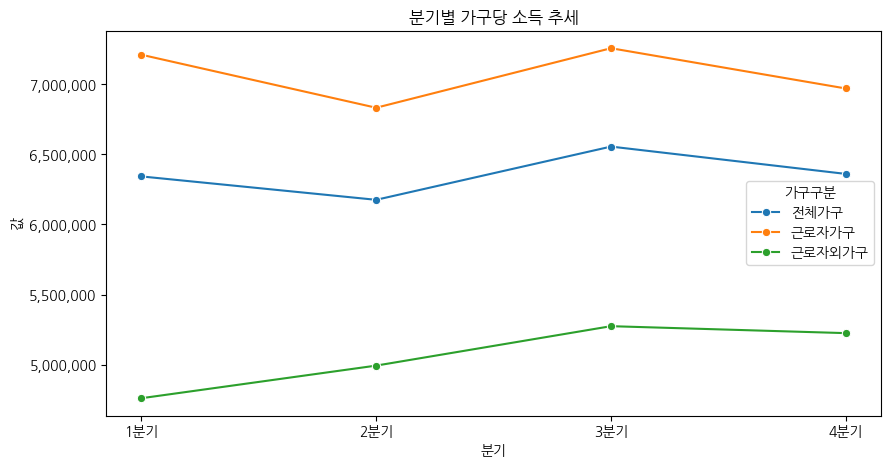

▶ 소비지출 통계 요약
소비지출 최소값: 3,053,275 원
소비지출 최대값: 3,870,178 원
소비지출 평균값: 3,485,708 원


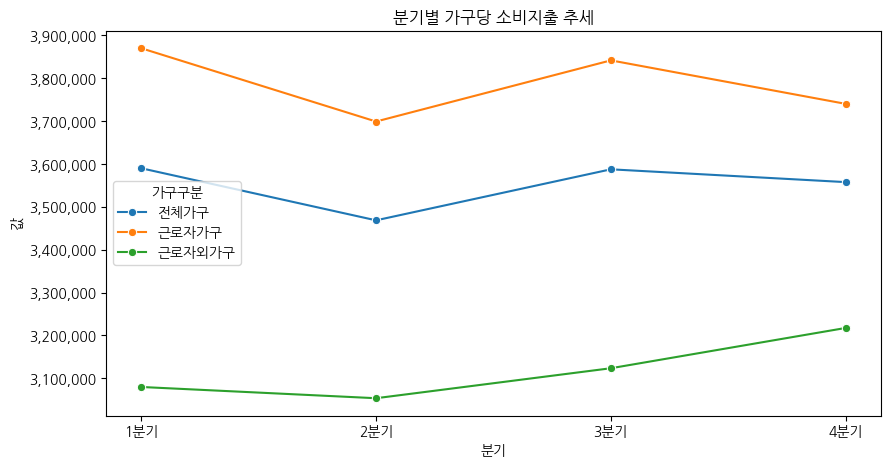

▶ 가계지출 통계 요약
가계지출 최소값: 3,873,827 원
가계지출 최대값: 5,471,356 원
가계지출 평균값: 4,724,935 원


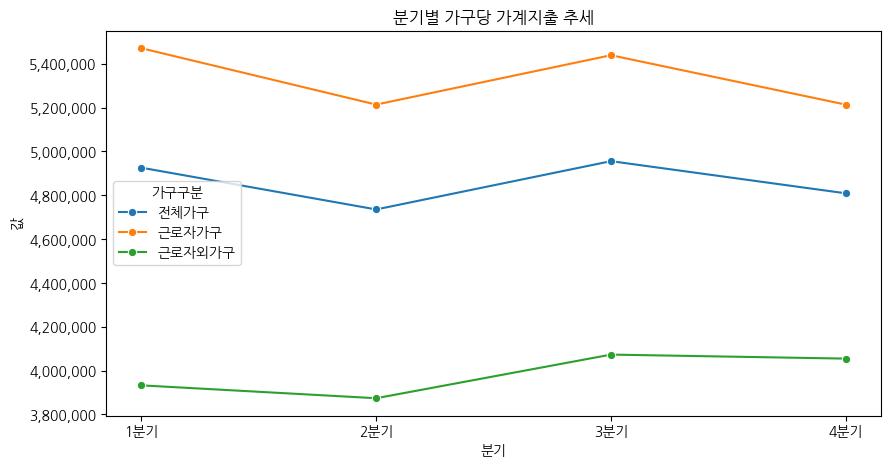

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 분석할 항목 리스트
items = ["소득", "소비지출", "가계지출"]
# 가계지출 = 소비지출 + 비소비지출(세금,연금,이자지출 등 포함)
# 소비지출 = 생활비 -> 부동산 시세와의 소비 관계 분석은 소비지출을 봐야함

for 항목 in items:
    print("="*40)
    print(f"▶ {항목} 통계 요약")

    df_temp = df_long[df_long["가계수지항목별"] == 항목].copy()

    # 최소/최대/평균 계산
    min_val = df_temp["값"].min()
    max_val = df_temp["값"].max()
    mean_val = df_temp["값"].mean()

    print(f"{항목} 최소값: {min_val:,.0f} 원")
    print(f"{항목} 최대값: {max_val:,.0f} 원")
    print(f"{항목} 평균값: {mean_val:,.0f} 원")

    # 추세 시각화
    plt.figure(figsize=(10,5))
    sns.lineplot(
        data=df_temp,
        x="분기", y="값", hue="가구구분",
        marker="o", estimator=None
    )
    plt.title(f"분기별 가구당 {항목} 추세")
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=0)
    plt.show()

## 파생지표 생성

### 저축액/ 저축률/ 주거비부담률 지표 생성

In [ ]:
# 1) 포함할 항목 지정
housing_col = "04.주거 · 수도 · 광열"  # 실제 항목명 그대로
need_cols = ["소득", "소비지출", "가계지출", housing_col]

# 2) 필요한 항목만 추출
df_sub = df_long[df_long["가계수지항목별"].isin(need_cols)].copy()

# 3) wide 변환
df_wide = df_sub.pivot_table(
    index=["연도","분기","가구구분"],
    columns="가계수지항목별",
    values="값"
).reset_index()
df_wide.columns.name = None  # 멀티인덱스 제거

# 4) 파생 지표 생성
df_wide["저축액"] = df_wide["소득"] - df_wide["소비지출"]
df_wide["저축률"] = df_wide["저축액"] / df_wide["소득"]
df_wide["주거비부담률"] = df_wide[housing_col] / df_wide["소득"]

# 5) 최종 확인
df_wide

,연도,분기,가구구분,04.주거 · 수도 · 광열,가계지출,소득,소비지출,저축액,저축률,주거비부담률
0,2024,1분기,근로자가구,434956.0,5471356.0,7210210.0,3870178.0,3340032.0,0.463236,0.060325
1,2024,1분기,근로자외가구,414366.0,3932568.0,4761552.0,3079536.0,1682016.0,0.353250,0.087023
2,2024,1분기,전체가구,427661.0,4926178.0,6342673.0,3590061.0,2752612.0,0.433983,0.067426
3,2024,2분기,근로자가구,387866.0,5214043.0,6832134.0,3699078.0,3133056.0,0.458576,0.056771
4,2024,2분기,근로자외가구,332152.0,3873827.0,4994024.0,3053275.0,1940749.0,0.388614,0.066510
5,2024,2분기,전체가구,367972.0,4735488.0,6175794.0,3468479.0,2707315.0,0.438375,0.059583
6,2024,3분기,근로자가구,361038.0,5439422.0,7256446.0,3841820.0,3414626.0,0.470565,0.049754
7,2024,3분기,근로자외가구,329536.0,4072947.0,5275104.0,3123273.0,2151831.0,0.407922,0.062470
8,2024,3분기,전체가구,349890.0,4955872.0,6555315.0,3587550.0,2967765.0,0.452727,0.053375
9,2024,4분기,근로자가구,368419.0,5213845.0,6969401.0,3740285.0,3229116.0,0.463328,0.052862


In [ ]:
# 비율 → 백분율 변환
df_wide["저축률(%)"] = (df_wide["저축률"] * 100).round(1)
df_wide["주거비부담률(%)"] = (df_wide["주거비부담률"] * 100).round(1)

# 확인
df_wide

,연도,분기,가구구분,04.주거 · 수도 · 광열,가계지출,소득,소비지출,저축액,저축률,주거비부담률,저축률(%),주거비부담률(%)
0,2024,1분기,근로자가구,434956.0,5471356.0,7210210.0,3870178.0,3340032.0,0.463236,0.060325,46.3,6.0
1,2024,1분기,근로자외가구,414366.0,3932568.0,4761552.0,3079536.0,1682016.0,0.353250,0.087023,35.3,8.7
2,2024,1분기,전체가구,427661.0,4926178.0,6342673.0,3590061.0,2752612.0,0.433983,0.067426,43.4,6.7
3,2024,2분기,근로자가구,387866.0,5214043.0,6832134.0,3699078.0,3133056.0,0.458576,0.056771,45.9,5.7
4,2024,2분기,근로자외가구,332152.0,3873827.0,4994024.0,3053275.0,1940749.0,0.388614,0.066510,38.9,6.7
5,2024,2분기,전체가구,367972.0,4735488.0,6175794.0,3468479.0,2707315.0,0.438375,0.059583,43.8,6.0
6,2024,3분기,근로자가구,361038.0,5439422.0,7256446.0,3841820.0,3414626.0,0.470565,0.049754,47.1,5.0
7,2024,3분기,근로자외가구,329536.0,4072947.0,5275104.0,3123273.0,2151831.0,0.407922,0.062470,40.8,6.2
8,2024,3분기,전체가구,349890.0,4955872.0,6555315.0,3587550.0,2967765.0,0.452727,0.053375,45.3,5.3
9,2024,4분기,근로자가구,368419.0,5213845.0,6969401.0,3740285.0,3229116.0,0.463328,0.052862,46.3,5.3


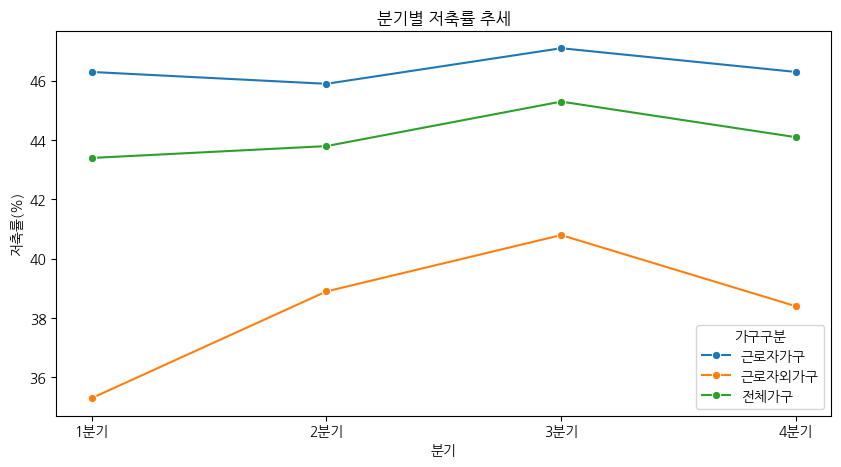

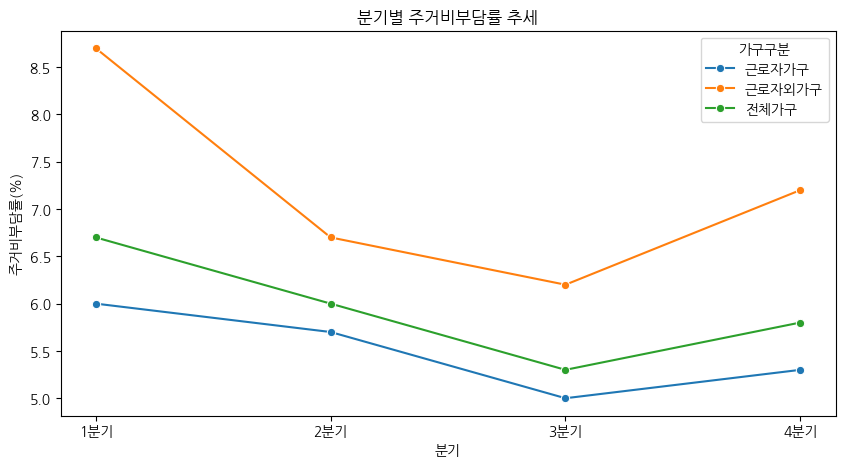

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=df_wide, x="분기", y="저축률(%)", hue="가구구분", marker="o")
plt.title("분기별 저축률 추세")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_wide, x="분기", y="주거비부담률(%)", hue="가구구분", marker="o")
plt.title("분기별 주거비부담률 추세")
plt.show()

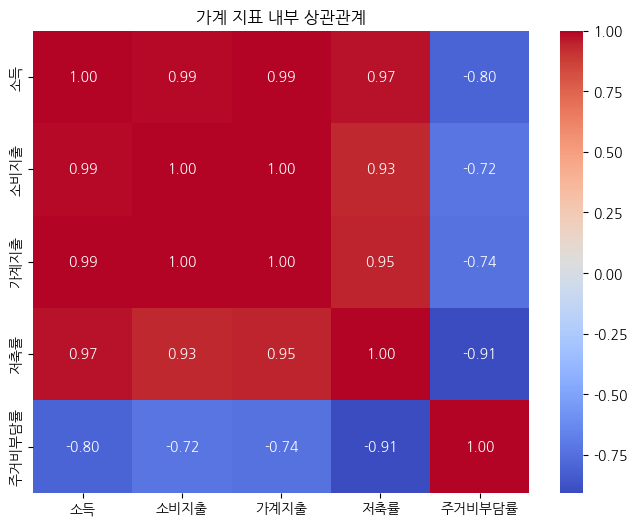

In [ ]:
import seaborn as sns

corr = df_wide[["소득","소비지출","가계지출","저축률","주거비부담률"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("가계 지표 내부 상관관계")
plt.show()

- 소득–소비지출–가계지출–저축률

    전부 0.9 이상 양의 상관관계

    → 소득이 오르면 소비·가계지출도 같이 오르고, 저축액도 늘어남.

    이건 자연스러운 구조 (소득 기반 데이터이기 때문에).

- 저축률–주거비부담률

    -0.91 (매우 강한 음의 상관)

    → 주거비 부담이 높을수록 저축률이 뚝 떨어진다는 걸 보여줌.

    해석: 주거 유지비가 커질수록 다른 소비 줄이기보다는 저축을 깎아내는 패턴.

- 소득–주거비부담률 (-0.80)

    소득이 높을수록 상대적으로 주거비 부담률이 줄어듦.

    → 고소득 가구는 소득 대비 주거비 비중이 작아 체감 부담이 낮음.

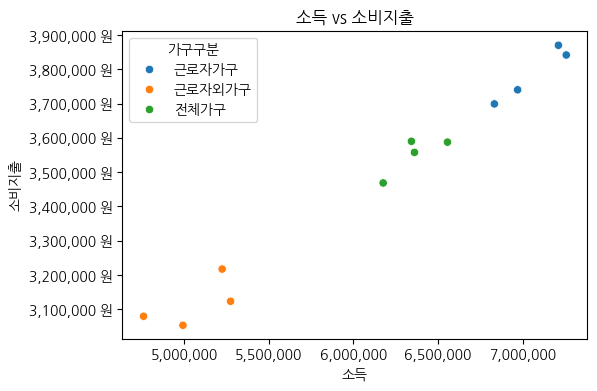

In [ ]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df_wide, x="소득", y="소비지출", hue="가구구분", ax=ax)
ax.set_title("소득 vs 소비지출")

# y축 단위 원화로 변환 (천 단위 콤마)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{int(y):,} 원"))
plt.show()


In [ ]:
df_wide = df_wide[['연도','분기','가구구분','소득','가계지출','소비지출','저축액','저축률(%)','주거비부담률(%)']]
df_wide.head()

,연도,분기,가구구분,소득,가계지출,소비지출,저축액,저축률(%),주거비부담률(%)
0,2024,1분기,근로자가구,7210210.0,5471356.0,3870178.0,3340032.0,46.3,6.0
1,2024,1분기,근로자외가구,4761552.0,3932568.0,3079536.0,1682016.0,35.3,8.7
2,2024,1분기,전체가구,6342673.0,4926178.0,3590061.0,2752612.0,43.4,6.7
3,2024,2분기,근로자가구,6832134.0,5214043.0,3699078.0,3133056.0,45.9,5.7
4,2024,2분기,근로자외가구,4994024.0,3873827.0,3053275.0,1940749.0,38.9,6.7


In [ ]:
# 저장 경로 (Colab 기준: 구글드라이브나 로컬)
output_path = "/content/df_wide_final.csv"

# 저장 (한글깨짐 방지 → utf-8-sig)
df_wide.to_csv(output_path, index=False, encoding="utf-8-sig")

print("✅ 저장 완료:", output_path)

✅ 저장 완료: /content/df_wide_final.csv
